In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns


t_0=13.78e9      # in units of years
t=13.78e9        # in units of years , let t=t_0 (i.e. calcluating the merger rate today)

# Calculation of the 1d merger rate for Power Law PDF    
α = 1.6
M=5
def P(m): #Powerlaw PBH mass distribution
    return (α-1)/M * (m/M)**(-α)


f_pbh = 4.3e-3
f = 0.85*f_pbh
σ_eq=0.005



def R_12(m_1, m_2):
    return (3.9e6 * f**2 *((t/t_0)**(-34/37))* (f**2 + σ_eq**2)**(-21/74) * min(P(m_1)/m_1, P(m_2)/m_2) * (P(m_1)/m_1 + P(m_2)/m_2) * (m_1*m_2)**(3/37) * (m_1+m_2)**(36/37))


In [3]:
m_1=6
m_2=8

y_1=math.log(m_1)
y_2=math.log(m_2)
dy=(y_2-y_1)

y_list=np.zeros(10)


for i in range(len(y_list)):
    y_list[i]= (y_1+(i*dy))
    

m_1_list=np.zeros(len(y_list))
m_2_list=np.zeros(len(y_list))

for i, y in enumerate(y_list):
    m_1_list[i]=(math.ceil(math.exp(y)))
    m_2_list[i]=(math.ceil(math.exp(y)))
    
print("m_1=",m_1_list) 
print("m_2=",m_2_list)



Δ_1_list=np.zeros(len(y_list))
Δ_2_list=np.zeros(len(y_list))

for i, y in enumerate(y_list):
    Δ_1_list[i] = math.exp(y + 0.5*dy)-math.exp(y - 0.5*dy)
    Δ_2_list[i] = math.exp(y + 0.5*dy)-math.exp(y - 0.5*dy)
    
print("Δ_1=",Δ_1_list)
print("Δ_2=",Δ_2_list)  

m_1= [ 6.  8. 11. 15. 19. 26. 34. 45. 60. 80.]
m_2= [ 6.  8. 11. 15. 19. 26. 34. 45. 60. 80.]
Δ_1= [ 1.73205081  2.30940108  3.07920144  4.10560191  5.47413589  7.29884785
  9.73179713 12.97572951 17.30097268 23.06796357]
Δ_2= [ 1.73205081  2.30940108  3.07920144  4.10560191  5.47413589  7.29884785
  9.73179713 12.97572951 17.30097268 23.06796357]


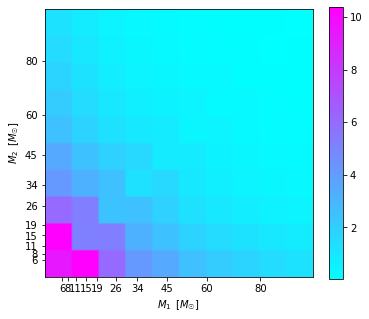

In [4]:
Merge = np.zeros((100, 100))


for j in range(10):
    for i in range(10):
        if i==j:
            Merge[i*10:(i+1)*10, j*10:(j+1)*10] = 0.5*R_12(m_1_list[i], m_2_list[j])*Δ_1_list[i]*Δ_2_list[j]
        else:
            Merge[i*10:(i+1)*10, j*10:(j+1)*10] = R_12(m_1_list[i], m_2_list[j])*Δ_1_list[i]*Δ_2_list[j]
            

            
            
    
fig,ax= plt.subplots(figsize=(6, 5)) 
pc=ax.imshow(Merge,cmap='cool',origin='lower')
fig.colorbar(pc)
ax.set_xticks([ 6. , 8. ,11., 15., 19., 26., 34., 45., 60., 80.])
ax.set_yticks([ 6. , 8. ,11., 15., 19., 26., 34., 45., 60., 80.])
plt.xlabel('$M_{1}\hspace{0.5}[M_{☉}]$')
plt.ylabel('$M_{2}\hspace{0.5}[M_{☉}]$')
plt.show()

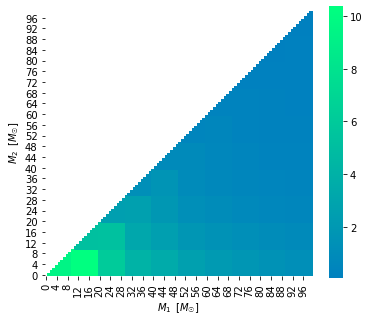

In [5]:
mask = np.tril(Merge,k=0)  #created an array of shape Merger_12 with all the elements in it being 0.



fig,ax= plt.subplots(figsize=(6, 5))  

ax = sns.heatmap(Merge,mask=mask,  square=True,  cmap='winter', cbar=True, center=0)
ax.invert_yaxis()
plt.xlabel('$M_{1}\hspace{0.5}[M_{☉}]$')
plt.ylabel('$M_{2}\hspace{0.5}[M_{☉}]$')
plt.show()     